In [1]:
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [3]:
y_train_loss = []
y_test_loss = []

In [4]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    train_loss /= len(train_loader.dataset)
    y_train_loss.append(train_loss)

In [5]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    y_test_loss.append(test_loss)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [10]:
batch_size = 64
test_batch_size = 1000
epochs = 50
lr = 0.01
momentum = 0.5
seed = 1
log_interval = 10

In [11]:
torch.manual_seed(seed)

device = torch.device("cuda")

kwargs = {'num_workers': 1, 'pin_memory': True}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=test_batch_size, shuffle=True, **kwargs)


model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.373651
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.310517
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.281828
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.315809
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.235439
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.234249
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.226109
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.228646
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.132811
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.113179
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.030113
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.877119
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.894014
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.725610
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.739437
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.533461
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.549235
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.498123
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.502510
Train Epoch: 1 [12160/60000 (20%)]	Loss: 1.326280
Train Epoch: 1 [12800/60000 (

Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.312191
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.426151
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.381450
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.445341
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.233409
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.192953
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.290371
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.339678
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.300722
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.450862
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.493237
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.234361
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.315052
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.269975
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.242512
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.199127
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.280393
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.238478
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.412499
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.449517


Train Epoch: 4 [30080/60000 (50%)]	Loss: 0.369954
Train Epoch: 4 [30720/60000 (51%)]	Loss: 0.144145
Train Epoch: 4 [31360/60000 (52%)]	Loss: 0.237095
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.147246
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.315612
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.287614
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.300780
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.275129
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.278973
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.078875
Train Epoch: 4 [36480/60000 (61%)]	Loss: 0.433658
Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.129433
Train Epoch: 4 [37760/60000 (63%)]	Loss: 0.279174
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.202645
Train Epoch: 4 [39040/60000 (65%)]	Loss: 0.188534
Train Epoch: 4 [39680/60000 (66%)]	Loss: 0.304030
Train Epoch: 4 [40320/60000 (67%)]	Loss: 0.309109
Train Epoch: 4 [40960/60000 (68%)]	Loss: 0.199013
Train Epoch: 4 [41600/60000 (69%)]	Loss: 0.368232
Train Epoch: 4 [42240/60000 (70%)]	Loss: 0.206823


Train Epoch: 6 [14720/60000 (25%)]	Loss: 0.174101
Train Epoch: 6 [15360/60000 (26%)]	Loss: 0.354699
Train Epoch: 6 [16000/60000 (27%)]	Loss: 0.117328
Train Epoch: 6 [16640/60000 (28%)]	Loss: 0.116913
Train Epoch: 6 [17280/60000 (29%)]	Loss: 0.195072
Train Epoch: 6 [17920/60000 (30%)]	Loss: 0.224360
Train Epoch: 6 [18560/60000 (31%)]	Loss: 0.164398
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.204247
Train Epoch: 6 [19840/60000 (33%)]	Loss: 0.258012
Train Epoch: 6 [20480/60000 (34%)]	Loss: 0.342756
Train Epoch: 6 [21120/60000 (35%)]	Loss: 0.385814
Train Epoch: 6 [21760/60000 (36%)]	Loss: 0.230075
Train Epoch: 6 [22400/60000 (37%)]	Loss: 0.146760
Train Epoch: 6 [23040/60000 (38%)]	Loss: 0.121891
Train Epoch: 6 [23680/60000 (39%)]	Loss: 0.185093
Train Epoch: 6 [24320/60000 (41%)]	Loss: 0.198639
Train Epoch: 6 [24960/60000 (42%)]	Loss: 0.122920
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.267725
Train Epoch: 6 [26240/60000 (44%)]	Loss: 0.268448
Train Epoch: 6 [26880/60000 (45%)]	Loss: 0.370774


Train Epoch: 7 [59520/60000 (99%)]	Loss: 0.238820

Test set: Average loss: 0.0657, Accuracy: 9796/10000 (98%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.281507
Train Epoch: 8 [640/60000 (1%)]	Loss: 0.119692
Train Epoch: 8 [1280/60000 (2%)]	Loss: 0.128097
Train Epoch: 8 [1920/60000 (3%)]	Loss: 0.164746
Train Epoch: 8 [2560/60000 (4%)]	Loss: 0.119309
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.287076
Train Epoch: 8 [3840/60000 (6%)]	Loss: 0.109004
Train Epoch: 8 [4480/60000 (7%)]	Loss: 0.163285
Train Epoch: 8 [5120/60000 (9%)]	Loss: 0.074723
Train Epoch: 8 [5760/60000 (10%)]	Loss: 0.184471
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.254099
Train Epoch: 8 [7040/60000 (12%)]	Loss: 0.062165
Train Epoch: 8 [7680/60000 (13%)]	Loss: 0.394714
Train Epoch: 8 [8320/60000 (14%)]	Loss: 0.073860
Train Epoch: 8 [8960/60000 (15%)]	Loss: 0.155219
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.304224
Train Epoch: 8 [10240/60000 (17%)]	Loss: 0.101957
Train Epoch: 8 [10880/60000 (18%)]	Loss: 0.145116
Train Epoch: 8 [11

Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.159236
Train Epoch: 9 [45440/60000 (76%)]	Loss: 0.189862
Train Epoch: 9 [46080/60000 (77%)]	Loss: 0.132873
Train Epoch: 9 [46720/60000 (78%)]	Loss: 0.212393
Train Epoch: 9 [47360/60000 (79%)]	Loss: 0.121604
Train Epoch: 9 [48000/60000 (80%)]	Loss: 0.135155
Train Epoch: 9 [48640/60000 (81%)]	Loss: 0.142047
Train Epoch: 9 [49280/60000 (82%)]	Loss: 0.121928
Train Epoch: 9 [49920/60000 (83%)]	Loss: 0.187986
Train Epoch: 9 [50560/60000 (84%)]	Loss: 0.170636
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.057475
Train Epoch: 9 [51840/60000 (86%)]	Loss: 0.104577
Train Epoch: 9 [52480/60000 (87%)]	Loss: 0.130105
Train Epoch: 9 [53120/60000 (88%)]	Loss: 0.216166
Train Epoch: 9 [53760/60000 (90%)]	Loss: 0.178278
Train Epoch: 9 [54400/60000 (91%)]	Loss: 0.118268
Train Epoch: 9 [55040/60000 (92%)]	Loss: 0.172459
Train Epoch: 9 [55680/60000 (93%)]	Loss: 0.051768
Train Epoch: 9 [56320/60000 (94%)]	Loss: 0.212819
Train Epoch: 9 [56960/60000 (95%)]	Loss: 0.187776


Train Epoch: 11 [28800/60000 (48%)]	Loss: 0.402765
Train Epoch: 11 [29440/60000 (49%)]	Loss: 0.135449
Train Epoch: 11 [30080/60000 (50%)]	Loss: 0.199685
Train Epoch: 11 [30720/60000 (51%)]	Loss: 0.259926
Train Epoch: 11 [31360/60000 (52%)]	Loss: 0.078435
Train Epoch: 11 [32000/60000 (53%)]	Loss: 0.125861
Train Epoch: 11 [32640/60000 (54%)]	Loss: 0.204224
Train Epoch: 11 [33280/60000 (55%)]	Loss: 0.146421
Train Epoch: 11 [33920/60000 (57%)]	Loss: 0.202336
Train Epoch: 11 [34560/60000 (58%)]	Loss: 0.156297
Train Epoch: 11 [35200/60000 (59%)]	Loss: 0.130764
Train Epoch: 11 [35840/60000 (60%)]	Loss: 0.248467
Train Epoch: 11 [36480/60000 (61%)]	Loss: 0.348832
Train Epoch: 11 [37120/60000 (62%)]	Loss: 0.115507
Train Epoch: 11 [37760/60000 (63%)]	Loss: 0.199138
Train Epoch: 11 [38400/60000 (64%)]	Loss: 0.287115
Train Epoch: 11 [39040/60000 (65%)]	Loss: 0.161102
Train Epoch: 11 [39680/60000 (66%)]	Loss: 0.287113
Train Epoch: 11 [40320/60000 (67%)]	Loss: 0.035896
Train Epoch: 11 [40960/60000 (6

Train Epoch: 13 [12800/60000 (21%)]	Loss: 0.100398
Train Epoch: 13 [13440/60000 (22%)]	Loss: 0.157220
Train Epoch: 13 [14080/60000 (23%)]	Loss: 0.111909
Train Epoch: 13 [14720/60000 (25%)]	Loss: 0.165489
Train Epoch: 13 [15360/60000 (26%)]	Loss: 0.118651
Train Epoch: 13 [16000/60000 (27%)]	Loss: 0.266036
Train Epoch: 13 [16640/60000 (28%)]	Loss: 0.163811
Train Epoch: 13 [17280/60000 (29%)]	Loss: 0.166968
Train Epoch: 13 [17920/60000 (30%)]	Loss: 0.099120
Train Epoch: 13 [18560/60000 (31%)]	Loss: 0.121703
Train Epoch: 13 [19200/60000 (32%)]	Loss: 0.071626
Train Epoch: 13 [19840/60000 (33%)]	Loss: 0.129469
Train Epoch: 13 [20480/60000 (34%)]	Loss: 0.217581
Train Epoch: 13 [21120/60000 (35%)]	Loss: 0.111110
Train Epoch: 13 [21760/60000 (36%)]	Loss: 0.088263
Train Epoch: 13 [22400/60000 (37%)]	Loss: 0.080173
Train Epoch: 13 [23040/60000 (38%)]	Loss: 0.220349
Train Epoch: 13 [23680/60000 (39%)]	Loss: 0.076951
Train Epoch: 13 [24320/60000 (41%)]	Loss: 0.221326
Train Epoch: 13 [24960/60000 (4

Train Epoch: 14 [55680/60000 (93%)]	Loss: 0.151891
Train Epoch: 14 [56320/60000 (94%)]	Loss: 0.074436
Train Epoch: 14 [56960/60000 (95%)]	Loss: 0.167888
Train Epoch: 14 [57600/60000 (96%)]	Loss: 0.182880
Train Epoch: 14 [58240/60000 (97%)]	Loss: 0.173802
Train Epoch: 14 [58880/60000 (98%)]	Loss: 0.287596
Train Epoch: 14 [59520/60000 (99%)]	Loss: 0.138546

Test set: Average loss: 0.0439, Accuracy: 9858/10000 (99%)

Train Epoch: 15 [0/60000 (0%)]	Loss: 0.088907
Train Epoch: 15 [640/60000 (1%)]	Loss: 0.209466
Train Epoch: 15 [1280/60000 (2%)]	Loss: 0.324293
Train Epoch: 15 [1920/60000 (3%)]	Loss: 0.223604
Train Epoch: 15 [2560/60000 (4%)]	Loss: 0.090534
Train Epoch: 15 [3200/60000 (5%)]	Loss: 0.134157
Train Epoch: 15 [3840/60000 (6%)]	Loss: 0.141407
Train Epoch: 15 [4480/60000 (7%)]	Loss: 0.155989
Train Epoch: 15 [5120/60000 (9%)]	Loss: 0.028618
Train Epoch: 15 [5760/60000 (10%)]	Loss: 0.089132
Train Epoch: 15 [6400/60000 (11%)]	Loss: 0.110477
Train Epoch: 15 [7040/60000 (12%)]	Loss: 0.12

Train Epoch: 16 [38400/60000 (64%)]	Loss: 0.130626
Train Epoch: 16 [39040/60000 (65%)]	Loss: 0.045476
Train Epoch: 16 [39680/60000 (66%)]	Loss: 0.083123
Train Epoch: 16 [40320/60000 (67%)]	Loss: 0.217795
Train Epoch: 16 [40960/60000 (68%)]	Loss: 0.169704
Train Epoch: 16 [41600/60000 (69%)]	Loss: 0.133890
Train Epoch: 16 [42240/60000 (70%)]	Loss: 0.190605
Train Epoch: 16 [42880/60000 (71%)]	Loss: 0.049276
Train Epoch: 16 [43520/60000 (72%)]	Loss: 0.037143
Train Epoch: 16 [44160/60000 (74%)]	Loss: 0.072665
Train Epoch: 16 [44800/60000 (75%)]	Loss: 0.207487
Train Epoch: 16 [45440/60000 (76%)]	Loss: 0.318873
Train Epoch: 16 [46080/60000 (77%)]	Loss: 0.079306
Train Epoch: 16 [46720/60000 (78%)]	Loss: 0.135300
Train Epoch: 16 [47360/60000 (79%)]	Loss: 0.077446
Train Epoch: 16 [48000/60000 (80%)]	Loss: 0.058718
Train Epoch: 16 [48640/60000 (81%)]	Loss: 0.116966
Train Epoch: 16 [49280/60000 (82%)]	Loss: 0.203779
Train Epoch: 16 [49920/60000 (83%)]	Loss: 0.157135
Train Epoch: 16 [50560/60000 (8

Train Epoch: 18 [20480/60000 (34%)]	Loss: 0.139833
Train Epoch: 18 [21120/60000 (35%)]	Loss: 0.163937
Train Epoch: 18 [21760/60000 (36%)]	Loss: 0.146427
Train Epoch: 18 [22400/60000 (37%)]	Loss: 0.049687
Train Epoch: 18 [23040/60000 (38%)]	Loss: 0.063677
Train Epoch: 18 [23680/60000 (39%)]	Loss: 0.465368
Train Epoch: 18 [24320/60000 (41%)]	Loss: 0.151941
Train Epoch: 18 [24960/60000 (42%)]	Loss: 0.271527
Train Epoch: 18 [25600/60000 (43%)]	Loss: 0.420767
Train Epoch: 18 [26240/60000 (44%)]	Loss: 0.155830
Train Epoch: 18 [26880/60000 (45%)]	Loss: 0.218812
Train Epoch: 18 [27520/60000 (46%)]	Loss: 0.144670
Train Epoch: 18 [28160/60000 (47%)]	Loss: 0.192130
Train Epoch: 18 [28800/60000 (48%)]	Loss: 0.129073
Train Epoch: 18 [29440/60000 (49%)]	Loss: 0.092794
Train Epoch: 18 [30080/60000 (50%)]	Loss: 0.244403
Train Epoch: 18 [30720/60000 (51%)]	Loss: 0.081647
Train Epoch: 18 [31360/60000 (52%)]	Loss: 0.142018
Train Epoch: 18 [32000/60000 (53%)]	Loss: 0.285515
Train Epoch: 18 [32640/60000 (5

Train Epoch: 20 [2560/60000 (4%)]	Loss: 0.138180
Train Epoch: 20 [3200/60000 (5%)]	Loss: 0.120136
Train Epoch: 20 [3840/60000 (6%)]	Loss: 0.096220
Train Epoch: 20 [4480/60000 (7%)]	Loss: 0.106217
Train Epoch: 20 [5120/60000 (9%)]	Loss: 0.044578
Train Epoch: 20 [5760/60000 (10%)]	Loss: 0.187333
Train Epoch: 20 [6400/60000 (11%)]	Loss: 0.063626
Train Epoch: 20 [7040/60000 (12%)]	Loss: 0.111174
Train Epoch: 20 [7680/60000 (13%)]	Loss: 0.084938
Train Epoch: 20 [8320/60000 (14%)]	Loss: 0.102855
Train Epoch: 20 [8960/60000 (15%)]	Loss: 0.059016
Train Epoch: 20 [9600/60000 (16%)]	Loss: 0.328985
Train Epoch: 20 [10240/60000 (17%)]	Loss: 0.093591
Train Epoch: 20 [10880/60000 (18%)]	Loss: 0.127668
Train Epoch: 20 [11520/60000 (19%)]	Loss: 0.070144
Train Epoch: 20 [12160/60000 (20%)]	Loss: 0.206895
Train Epoch: 20 [12800/60000 (21%)]	Loss: 0.090219
Train Epoch: 20 [13440/60000 (22%)]	Loss: 0.064873
Train Epoch: 20 [14080/60000 (23%)]	Loss: 0.140729
Train Epoch: 20 [14720/60000 (25%)]	Loss: 0.0689

Train Epoch: 21 [45440/60000 (76%)]	Loss: 0.055467
Train Epoch: 21 [46080/60000 (77%)]	Loss: 0.090775
Train Epoch: 21 [46720/60000 (78%)]	Loss: 0.071652
Train Epoch: 21 [47360/60000 (79%)]	Loss: 0.196190
Train Epoch: 21 [48000/60000 (80%)]	Loss: 0.290101
Train Epoch: 21 [48640/60000 (81%)]	Loss: 0.044060
Train Epoch: 21 [49280/60000 (82%)]	Loss: 0.145048
Train Epoch: 21 [49920/60000 (83%)]	Loss: 0.152101
Train Epoch: 21 [50560/60000 (84%)]	Loss: 0.121502
Train Epoch: 21 [51200/60000 (85%)]	Loss: 0.054872
Train Epoch: 21 [51840/60000 (86%)]	Loss: 0.123668
Train Epoch: 21 [52480/60000 (87%)]	Loss: 0.140796
Train Epoch: 21 [53120/60000 (88%)]	Loss: 0.142224
Train Epoch: 21 [53760/60000 (90%)]	Loss: 0.083306
Train Epoch: 21 [54400/60000 (91%)]	Loss: 0.070967
Train Epoch: 21 [55040/60000 (92%)]	Loss: 0.138739
Train Epoch: 21 [55680/60000 (93%)]	Loss: 0.148334
Train Epoch: 21 [56320/60000 (94%)]	Loss: 0.053737
Train Epoch: 21 [56960/60000 (95%)]	Loss: 0.017506
Train Epoch: 21 [57600/60000 (9

Train Epoch: 23 [27520/60000 (46%)]	Loss: 0.084734
Train Epoch: 23 [28160/60000 (47%)]	Loss: 0.063002
Train Epoch: 23 [28800/60000 (48%)]	Loss: 0.150812
Train Epoch: 23 [29440/60000 (49%)]	Loss: 0.286685
Train Epoch: 23 [30080/60000 (50%)]	Loss: 0.137000
Train Epoch: 23 [30720/60000 (51%)]	Loss: 0.262451
Train Epoch: 23 [31360/60000 (52%)]	Loss: 0.194676
Train Epoch: 23 [32000/60000 (53%)]	Loss: 0.078928
Train Epoch: 23 [32640/60000 (54%)]	Loss: 0.096641
Train Epoch: 23 [33280/60000 (55%)]	Loss: 0.056610
Train Epoch: 23 [33920/60000 (57%)]	Loss: 0.102137
Train Epoch: 23 [34560/60000 (58%)]	Loss: 0.091868
Train Epoch: 23 [35200/60000 (59%)]	Loss: 0.054918
Train Epoch: 23 [35840/60000 (60%)]	Loss: 0.244809
Train Epoch: 23 [36480/60000 (61%)]	Loss: 0.125721
Train Epoch: 23 [37120/60000 (62%)]	Loss: 0.174519
Train Epoch: 23 [37760/60000 (63%)]	Loss: 0.110475
Train Epoch: 23 [38400/60000 (64%)]	Loss: 0.081902
Train Epoch: 23 [39040/60000 (65%)]	Loss: 0.182069
Train Epoch: 23 [39680/60000 (6

Train Epoch: 25 [9600/60000 (16%)]	Loss: 0.129341
Train Epoch: 25 [10240/60000 (17%)]	Loss: 0.039999
Train Epoch: 25 [10880/60000 (18%)]	Loss: 0.048446
Train Epoch: 25 [11520/60000 (19%)]	Loss: 0.152918
Train Epoch: 25 [12160/60000 (20%)]	Loss: 0.212334
Train Epoch: 25 [12800/60000 (21%)]	Loss: 0.114353
Train Epoch: 25 [13440/60000 (22%)]	Loss: 0.054909
Train Epoch: 25 [14080/60000 (23%)]	Loss: 0.196626
Train Epoch: 25 [14720/60000 (25%)]	Loss: 0.040728
Train Epoch: 25 [15360/60000 (26%)]	Loss: 0.219534
Train Epoch: 25 [16000/60000 (27%)]	Loss: 0.142816
Train Epoch: 25 [16640/60000 (28%)]	Loss: 0.088350
Train Epoch: 25 [17280/60000 (29%)]	Loss: 0.098556
Train Epoch: 25 [17920/60000 (30%)]	Loss: 0.109059
Train Epoch: 25 [18560/60000 (31%)]	Loss: 0.120361
Train Epoch: 25 [19200/60000 (32%)]	Loss: 0.120124
Train Epoch: 25 [19840/60000 (33%)]	Loss: 0.049751
Train Epoch: 25 [20480/60000 (34%)]	Loss: 0.096811
Train Epoch: 25 [21120/60000 (35%)]	Loss: 0.204873
Train Epoch: 25 [21760/60000 (36

Train Epoch: 26 [53760/60000 (90%)]	Loss: 0.072241
Train Epoch: 26 [54400/60000 (91%)]	Loss: 0.131817
Train Epoch: 26 [55040/60000 (92%)]	Loss: 0.042153
Train Epoch: 26 [55680/60000 (93%)]	Loss: 0.022576
Train Epoch: 26 [56320/60000 (94%)]	Loss: 0.227671
Train Epoch: 26 [56960/60000 (95%)]	Loss: 0.059437
Train Epoch: 26 [57600/60000 (96%)]	Loss: 0.151592
Train Epoch: 26 [58240/60000 (97%)]	Loss: 0.067036
Train Epoch: 26 [58880/60000 (98%)]	Loss: 0.105840
Train Epoch: 26 [59520/60000 (99%)]	Loss: 0.146790

Test set: Average loss: 0.0335, Accuracy: 9892/10000 (99%)

Train Epoch: 27 [0/60000 (0%)]	Loss: 0.099403
Train Epoch: 27 [640/60000 (1%)]	Loss: 0.087740
Train Epoch: 27 [1280/60000 (2%)]	Loss: 0.061557
Train Epoch: 27 [1920/60000 (3%)]	Loss: 0.091794
Train Epoch: 27 [2560/60000 (4%)]	Loss: 0.075335
Train Epoch: 27 [3200/60000 (5%)]	Loss: 0.050472
Train Epoch: 27 [3840/60000 (6%)]	Loss: 0.022123
Train Epoch: 27 [4480/60000 (7%)]	Loss: 0.107686
Train Epoch: 27 [5120/60000 (9%)]	Loss: 0

Train Epoch: 28 [35840/60000 (60%)]	Loss: 0.056126
Train Epoch: 28 [36480/60000 (61%)]	Loss: 0.157152
Train Epoch: 28 [37120/60000 (62%)]	Loss: 0.145259
Train Epoch: 28 [37760/60000 (63%)]	Loss: 0.099216
Train Epoch: 28 [38400/60000 (64%)]	Loss: 0.103811
Train Epoch: 28 [39040/60000 (65%)]	Loss: 0.162037
Train Epoch: 28 [39680/60000 (66%)]	Loss: 0.020236
Train Epoch: 28 [40320/60000 (67%)]	Loss: 0.150651
Train Epoch: 28 [40960/60000 (68%)]	Loss: 0.192388
Train Epoch: 28 [41600/60000 (69%)]	Loss: 0.086544
Train Epoch: 28 [42240/60000 (70%)]	Loss: 0.057927
Train Epoch: 28 [42880/60000 (71%)]	Loss: 0.155605
Train Epoch: 28 [43520/60000 (72%)]	Loss: 0.054906
Train Epoch: 28 [44160/60000 (74%)]	Loss: 0.039295
Train Epoch: 28 [44800/60000 (75%)]	Loss: 0.116046
Train Epoch: 28 [45440/60000 (76%)]	Loss: 0.061918
Train Epoch: 28 [46080/60000 (77%)]	Loss: 0.058403
Train Epoch: 28 [46720/60000 (78%)]	Loss: 0.156559
Train Epoch: 28 [47360/60000 (79%)]	Loss: 0.116217
Train Epoch: 28 [48000/60000 (8

Train Epoch: 30 [17920/60000 (30%)]	Loss: 0.131357
Train Epoch: 30 [18560/60000 (31%)]	Loss: 0.071703
Train Epoch: 30 [19200/60000 (32%)]	Loss: 0.189106
Train Epoch: 30 [19840/60000 (33%)]	Loss: 0.143262
Train Epoch: 30 [20480/60000 (34%)]	Loss: 0.061784
Train Epoch: 30 [21120/60000 (35%)]	Loss: 0.143560
Train Epoch: 30 [21760/60000 (36%)]	Loss: 0.125737
Train Epoch: 30 [22400/60000 (37%)]	Loss: 0.094803
Train Epoch: 30 [23040/60000 (38%)]	Loss: 0.100204
Train Epoch: 30 [23680/60000 (39%)]	Loss: 0.133476
Train Epoch: 30 [24320/60000 (41%)]	Loss: 0.029079
Train Epoch: 30 [24960/60000 (42%)]	Loss: 0.060912
Train Epoch: 30 [25600/60000 (43%)]	Loss: 0.182092
Train Epoch: 30 [26240/60000 (44%)]	Loss: 0.056594
Train Epoch: 30 [26880/60000 (45%)]	Loss: 0.121699
Train Epoch: 30 [27520/60000 (46%)]	Loss: 0.056970
Train Epoch: 30 [28160/60000 (47%)]	Loss: 0.129685
Train Epoch: 30 [28800/60000 (48%)]	Loss: 0.036520
Train Epoch: 30 [29440/60000 (49%)]	Loss: 0.033766
Train Epoch: 30 [30080/60000 (5

Train Epoch: 32 [0/60000 (0%)]	Loss: 0.044198
Train Epoch: 32 [640/60000 (1%)]	Loss: 0.057269
Train Epoch: 32 [1280/60000 (2%)]	Loss: 0.253850
Train Epoch: 32 [1920/60000 (3%)]	Loss: 0.071941
Train Epoch: 32 [2560/60000 (4%)]	Loss: 0.202469
Train Epoch: 32 [3200/60000 (5%)]	Loss: 0.136243
Train Epoch: 32 [3840/60000 (6%)]	Loss: 0.077636
Train Epoch: 32 [4480/60000 (7%)]	Loss: 0.030372
Train Epoch: 32 [5120/60000 (9%)]	Loss: 0.106160
Train Epoch: 32 [5760/60000 (10%)]	Loss: 0.146686
Train Epoch: 32 [6400/60000 (11%)]	Loss: 0.087965
Train Epoch: 32 [7040/60000 (12%)]	Loss: 0.107962
Train Epoch: 32 [7680/60000 (13%)]	Loss: 0.077248
Train Epoch: 32 [8320/60000 (14%)]	Loss: 0.122788
Train Epoch: 32 [8960/60000 (15%)]	Loss: 0.095625
Train Epoch: 32 [9600/60000 (16%)]	Loss: 0.058915
Train Epoch: 32 [10240/60000 (17%)]	Loss: 0.106420
Train Epoch: 32 [10880/60000 (18%)]	Loss: 0.105400
Train Epoch: 32 [11520/60000 (19%)]	Loss: 0.090813
Train Epoch: 32 [12160/60000 (20%)]	Loss: 0.271565
Train Epo

Train Epoch: 33 [43520/60000 (72%)]	Loss: 0.098805
Train Epoch: 33 [44160/60000 (74%)]	Loss: 0.036463
Train Epoch: 33 [44800/60000 (75%)]	Loss: 0.137527
Train Epoch: 33 [45440/60000 (76%)]	Loss: 0.178994
Train Epoch: 33 [46080/60000 (77%)]	Loss: 0.080657
Train Epoch: 33 [46720/60000 (78%)]	Loss: 0.047187
Train Epoch: 33 [47360/60000 (79%)]	Loss: 0.096904
Train Epoch: 33 [48000/60000 (80%)]	Loss: 0.059504
Train Epoch: 33 [48640/60000 (81%)]	Loss: 0.128384
Train Epoch: 33 [49280/60000 (82%)]	Loss: 0.056698
Train Epoch: 33 [49920/60000 (83%)]	Loss: 0.031840
Train Epoch: 33 [50560/60000 (84%)]	Loss: 0.124690
Train Epoch: 33 [51200/60000 (85%)]	Loss: 0.158399
Train Epoch: 33 [51840/60000 (86%)]	Loss: 0.219706
Train Epoch: 33 [52480/60000 (87%)]	Loss: 0.108385
Train Epoch: 33 [53120/60000 (88%)]	Loss: 0.035752
Train Epoch: 33 [53760/60000 (90%)]	Loss: 0.074095
Train Epoch: 33 [54400/60000 (91%)]	Loss: 0.061453
Train Epoch: 33 [55040/60000 (92%)]	Loss: 0.117049
Train Epoch: 33 [55680/60000 (9

Train Epoch: 35 [25600/60000 (43%)]	Loss: 0.118254
Train Epoch: 35 [26240/60000 (44%)]	Loss: 0.121916
Train Epoch: 35 [26880/60000 (45%)]	Loss: 0.118065
Train Epoch: 35 [27520/60000 (46%)]	Loss: 0.137332
Train Epoch: 35 [28160/60000 (47%)]	Loss: 0.087310
Train Epoch: 35 [28800/60000 (48%)]	Loss: 0.070910
Train Epoch: 35 [29440/60000 (49%)]	Loss: 0.145729
Train Epoch: 35 [30080/60000 (50%)]	Loss: 0.192219
Train Epoch: 35 [30720/60000 (51%)]	Loss: 0.110738
Train Epoch: 35 [31360/60000 (52%)]	Loss: 0.045866
Train Epoch: 35 [32000/60000 (53%)]	Loss: 0.057055
Train Epoch: 35 [32640/60000 (54%)]	Loss: 0.153707
Train Epoch: 35 [33280/60000 (55%)]	Loss: 0.047557
Train Epoch: 35 [33920/60000 (57%)]	Loss: 0.183829
Train Epoch: 35 [34560/60000 (58%)]	Loss: 0.172023
Train Epoch: 35 [35200/60000 (59%)]	Loss: 0.075062
Train Epoch: 35 [35840/60000 (60%)]	Loss: 0.101196
Train Epoch: 35 [36480/60000 (61%)]	Loss: 0.113921
Train Epoch: 35 [37120/60000 (62%)]	Loss: 0.064294
Train Epoch: 35 [37760/60000 (6

Train Epoch: 37 [7680/60000 (13%)]	Loss: 0.057033
Train Epoch: 37 [8320/60000 (14%)]	Loss: 0.172958
Train Epoch: 37 [8960/60000 (15%)]	Loss: 0.020810
Train Epoch: 37 [9600/60000 (16%)]	Loss: 0.061613
Train Epoch: 37 [10240/60000 (17%)]	Loss: 0.046592
Train Epoch: 37 [10880/60000 (18%)]	Loss: 0.063317
Train Epoch: 37 [11520/60000 (19%)]	Loss: 0.031389
Train Epoch: 37 [12160/60000 (20%)]	Loss: 0.124322
Train Epoch: 37 [12800/60000 (21%)]	Loss: 0.111039
Train Epoch: 37 [13440/60000 (22%)]	Loss: 0.112661
Train Epoch: 37 [14080/60000 (23%)]	Loss: 0.033739
Train Epoch: 37 [14720/60000 (25%)]	Loss: 0.088222
Train Epoch: 37 [15360/60000 (26%)]	Loss: 0.076485
Train Epoch: 37 [16000/60000 (27%)]	Loss: 0.014165
Train Epoch: 37 [16640/60000 (28%)]	Loss: 0.106081
Train Epoch: 37 [17280/60000 (29%)]	Loss: 0.106552
Train Epoch: 37 [17920/60000 (30%)]	Loss: 0.325296
Train Epoch: 37 [18560/60000 (31%)]	Loss: 0.121872
Train Epoch: 37 [19200/60000 (32%)]	Loss: 0.022284
Train Epoch: 37 [19840/60000 (33%)]

Train Epoch: 38 [51200/60000 (85%)]	Loss: 0.057689
Train Epoch: 38 [51840/60000 (86%)]	Loss: 0.099802
Train Epoch: 38 [52480/60000 (87%)]	Loss: 0.040885
Train Epoch: 38 [53120/60000 (88%)]	Loss: 0.203240
Train Epoch: 38 [53760/60000 (90%)]	Loss: 0.105092
Train Epoch: 38 [54400/60000 (91%)]	Loss: 0.063991
Train Epoch: 38 [55040/60000 (92%)]	Loss: 0.067011
Train Epoch: 38 [55680/60000 (93%)]	Loss: 0.098550
Train Epoch: 38 [56320/60000 (94%)]	Loss: 0.119074
Train Epoch: 38 [56960/60000 (95%)]	Loss: 0.287670
Train Epoch: 38 [57600/60000 (96%)]	Loss: 0.068368
Train Epoch: 38 [58240/60000 (97%)]	Loss: 0.010422
Train Epoch: 38 [58880/60000 (98%)]	Loss: 0.094124
Train Epoch: 38 [59520/60000 (99%)]	Loss: 0.054348

Test set: Average loss: 0.0309, Accuracy: 9905/10000 (99%)

Train Epoch: 39 [0/60000 (0%)]	Loss: 0.077378
Train Epoch: 39 [640/60000 (1%)]	Loss: 0.227103
Train Epoch: 39 [1280/60000 (2%)]	Loss: 0.210739
Train Epoch: 39 [1920/60000 (3%)]	Loss: 0.051811
Train Epoch: 39 [2560/60000 (4%)]

Train Epoch: 40 [33280/60000 (55%)]	Loss: 0.197710
Train Epoch: 40 [33920/60000 (57%)]	Loss: 0.076774
Train Epoch: 40 [34560/60000 (58%)]	Loss: 0.033645
Train Epoch: 40 [35200/60000 (59%)]	Loss: 0.035452
Train Epoch: 40 [35840/60000 (60%)]	Loss: 0.051174
Train Epoch: 40 [36480/60000 (61%)]	Loss: 0.086088
Train Epoch: 40 [37120/60000 (62%)]	Loss: 0.396544
Train Epoch: 40 [37760/60000 (63%)]	Loss: 0.175382
Train Epoch: 40 [38400/60000 (64%)]	Loss: 0.059422
Train Epoch: 40 [39040/60000 (65%)]	Loss: 0.135121
Train Epoch: 40 [39680/60000 (66%)]	Loss: 0.069936
Train Epoch: 40 [40320/60000 (67%)]	Loss: 0.058897
Train Epoch: 40 [40960/60000 (68%)]	Loss: 0.064481
Train Epoch: 40 [41600/60000 (69%)]	Loss: 0.069631
Train Epoch: 40 [42240/60000 (70%)]	Loss: 0.061990
Train Epoch: 40 [42880/60000 (71%)]	Loss: 0.063020
Train Epoch: 40 [43520/60000 (72%)]	Loss: 0.199315
Train Epoch: 40 [44160/60000 (74%)]	Loss: 0.022893
Train Epoch: 40 [44800/60000 (75%)]	Loss: 0.040209
Train Epoch: 40 [45440/60000 (7

Train Epoch: 42 [15360/60000 (26%)]	Loss: 0.068128
Train Epoch: 42 [16000/60000 (27%)]	Loss: 0.114437
Train Epoch: 42 [16640/60000 (28%)]	Loss: 0.248053
Train Epoch: 42 [17280/60000 (29%)]	Loss: 0.027936
Train Epoch: 42 [17920/60000 (30%)]	Loss: 0.088234
Train Epoch: 42 [18560/60000 (31%)]	Loss: 0.251679
Train Epoch: 42 [19200/60000 (32%)]	Loss: 0.075098
Train Epoch: 42 [19840/60000 (33%)]	Loss: 0.074275
Train Epoch: 42 [20480/60000 (34%)]	Loss: 0.117132
Train Epoch: 42 [21120/60000 (35%)]	Loss: 0.202527
Train Epoch: 42 [21760/60000 (36%)]	Loss: 0.047095
Train Epoch: 42 [22400/60000 (37%)]	Loss: 0.137199
Train Epoch: 42 [23040/60000 (38%)]	Loss: 0.196760
Train Epoch: 42 [23680/60000 (39%)]	Loss: 0.135534
Train Epoch: 42 [24320/60000 (41%)]	Loss: 0.069019
Train Epoch: 42 [24960/60000 (42%)]	Loss: 0.038562
Train Epoch: 42 [25600/60000 (43%)]	Loss: 0.063852
Train Epoch: 42 [26240/60000 (44%)]	Loss: 0.078311
Train Epoch: 42 [26880/60000 (45%)]	Loss: 0.069492
Train Epoch: 42 [27520/60000 (4

Train Epoch: 43 [58880/60000 (98%)]	Loss: 0.179037
Train Epoch: 43 [59520/60000 (99%)]	Loss: 0.140090

Test set: Average loss: 0.0316, Accuracy: 9900/10000 (99%)

Train Epoch: 44 [0/60000 (0%)]	Loss: 0.236457
Train Epoch: 44 [640/60000 (1%)]	Loss: 0.106289
Train Epoch: 44 [1280/60000 (2%)]	Loss: 0.191675
Train Epoch: 44 [1920/60000 (3%)]	Loss: 0.620980
Train Epoch: 44 [2560/60000 (4%)]	Loss: 0.366034
Train Epoch: 44 [3200/60000 (5%)]	Loss: 0.071941
Train Epoch: 44 [3840/60000 (6%)]	Loss: 0.100553
Train Epoch: 44 [4480/60000 (7%)]	Loss: 0.260270
Train Epoch: 44 [5120/60000 (9%)]	Loss: 0.135618
Train Epoch: 44 [5760/60000 (10%)]	Loss: 0.181248
Train Epoch: 44 [6400/60000 (11%)]	Loss: 0.036377
Train Epoch: 44 [7040/60000 (12%)]	Loss: 0.039798
Train Epoch: 44 [7680/60000 (13%)]	Loss: 0.080689
Train Epoch: 44 [8320/60000 (14%)]	Loss: 0.095766
Train Epoch: 44 [8960/60000 (15%)]	Loss: 0.086544
Train Epoch: 44 [9600/60000 (16%)]	Loss: 0.121637
Train Epoch: 44 [10240/60000 (17%)]	Loss: 0.184970

Train Epoch: 45 [40960/60000 (68%)]	Loss: 0.053984
Train Epoch: 45 [41600/60000 (69%)]	Loss: 0.050543
Train Epoch: 45 [42240/60000 (70%)]	Loss: 0.070470
Train Epoch: 45 [42880/60000 (71%)]	Loss: 0.148269
Train Epoch: 45 [43520/60000 (72%)]	Loss: 0.121212
Train Epoch: 45 [44160/60000 (74%)]	Loss: 0.229247
Train Epoch: 45 [44800/60000 (75%)]	Loss: 0.120573
Train Epoch: 45 [45440/60000 (76%)]	Loss: 0.148218
Train Epoch: 45 [46080/60000 (77%)]	Loss: 0.056182
Train Epoch: 45 [46720/60000 (78%)]	Loss: 0.120415
Train Epoch: 45 [47360/60000 (79%)]	Loss: 0.103824
Train Epoch: 45 [48000/60000 (80%)]	Loss: 0.071337
Train Epoch: 45 [48640/60000 (81%)]	Loss: 0.078838
Train Epoch: 45 [49280/60000 (82%)]	Loss: 0.071156
Train Epoch: 45 [49920/60000 (83%)]	Loss: 0.137173
Train Epoch: 45 [50560/60000 (84%)]	Loss: 0.058774
Train Epoch: 45 [51200/60000 (85%)]	Loss: 0.098457
Train Epoch: 45 [51840/60000 (86%)]	Loss: 0.036302
Train Epoch: 45 [52480/60000 (87%)]	Loss: 0.042206
Train Epoch: 45 [53120/60000 (8

Train Epoch: 47 [23040/60000 (38%)]	Loss: 0.167966
Train Epoch: 47 [23680/60000 (39%)]	Loss: 0.206593
Train Epoch: 47 [24320/60000 (41%)]	Loss: 0.119274
Train Epoch: 47 [24960/60000 (42%)]	Loss: 0.044398
Train Epoch: 47 [25600/60000 (43%)]	Loss: 0.051796
Train Epoch: 47 [26240/60000 (44%)]	Loss: 0.160397
Train Epoch: 47 [26880/60000 (45%)]	Loss: 0.243999
Train Epoch: 47 [27520/60000 (46%)]	Loss: 0.084125
Train Epoch: 47 [28160/60000 (47%)]	Loss: 0.027121
Train Epoch: 47 [28800/60000 (48%)]	Loss: 0.055289
Train Epoch: 47 [29440/60000 (49%)]	Loss: 0.063522
Train Epoch: 47 [30080/60000 (50%)]	Loss: 0.095995
Train Epoch: 47 [30720/60000 (51%)]	Loss: 0.118344
Train Epoch: 47 [31360/60000 (52%)]	Loss: 0.097799
Train Epoch: 47 [32000/60000 (53%)]	Loss: 0.079787
Train Epoch: 47 [32640/60000 (54%)]	Loss: 0.081412
Train Epoch: 47 [33280/60000 (55%)]	Loss: 0.237263
Train Epoch: 47 [33920/60000 (57%)]	Loss: 0.104106
Train Epoch: 47 [34560/60000 (58%)]	Loss: 0.025912
Train Epoch: 47 [35200/60000 (5

Train Epoch: 49 [5120/60000 (9%)]	Loss: 0.167698
Train Epoch: 49 [5760/60000 (10%)]	Loss: 0.051109
Train Epoch: 49 [6400/60000 (11%)]	Loss: 0.145311
Train Epoch: 49 [7040/60000 (12%)]	Loss: 0.235238
Train Epoch: 49 [7680/60000 (13%)]	Loss: 0.092197
Train Epoch: 49 [8320/60000 (14%)]	Loss: 0.102903
Train Epoch: 49 [8960/60000 (15%)]	Loss: 0.078845
Train Epoch: 49 [9600/60000 (16%)]	Loss: 0.172612
Train Epoch: 49 [10240/60000 (17%)]	Loss: 0.014170
Train Epoch: 49 [10880/60000 (18%)]	Loss: 0.078923
Train Epoch: 49 [11520/60000 (19%)]	Loss: 0.136403
Train Epoch: 49 [12160/60000 (20%)]	Loss: 0.049024
Train Epoch: 49 [12800/60000 (21%)]	Loss: 0.088188
Train Epoch: 49 [13440/60000 (22%)]	Loss: 0.205827
Train Epoch: 49 [14080/60000 (23%)]	Loss: 0.034798
Train Epoch: 49 [14720/60000 (25%)]	Loss: 0.047159
Train Epoch: 49 [15360/60000 (26%)]	Loss: 0.093553
Train Epoch: 49 [16000/60000 (27%)]	Loss: 0.101746
Train Epoch: 49 [16640/60000 (28%)]	Loss: 0.163243
Train Epoch: 49 [17280/60000 (29%)]	Loss

Train Epoch: 50 [48000/60000 (80%)]	Loss: 0.026036
Train Epoch: 50 [48640/60000 (81%)]	Loss: 0.100767
Train Epoch: 50 [49280/60000 (82%)]	Loss: 0.186711
Train Epoch: 50 [49920/60000 (83%)]	Loss: 0.065226
Train Epoch: 50 [50560/60000 (84%)]	Loss: 0.056637
Train Epoch: 50 [51200/60000 (85%)]	Loss: 0.092437
Train Epoch: 50 [51840/60000 (86%)]	Loss: 0.109486
Train Epoch: 50 [52480/60000 (87%)]	Loss: 0.171933
Train Epoch: 50 [53120/60000 (88%)]	Loss: 0.194309
Train Epoch: 50 [53760/60000 (90%)]	Loss: 0.064442
Train Epoch: 50 [54400/60000 (91%)]	Loss: 0.082730
Train Epoch: 50 [55040/60000 (92%)]	Loss: 0.119758
Train Epoch: 50 [55680/60000 (93%)]	Loss: 0.076891
Train Epoch: 50 [56320/60000 (94%)]	Loss: 0.040327
Train Epoch: 50 [56960/60000 (95%)]	Loss: 0.109338
Train Epoch: 50 [57600/60000 (96%)]	Loss: 0.125281
Train Epoch: 50 [58240/60000 (97%)]	Loss: 0.247572
Train Epoch: 50 [58880/60000 (98%)]	Loss: 0.036701
Train Epoch: 50 [59520/60000 (99%)]	Loss: 0.031627

Test set: Average loss: 0.0320

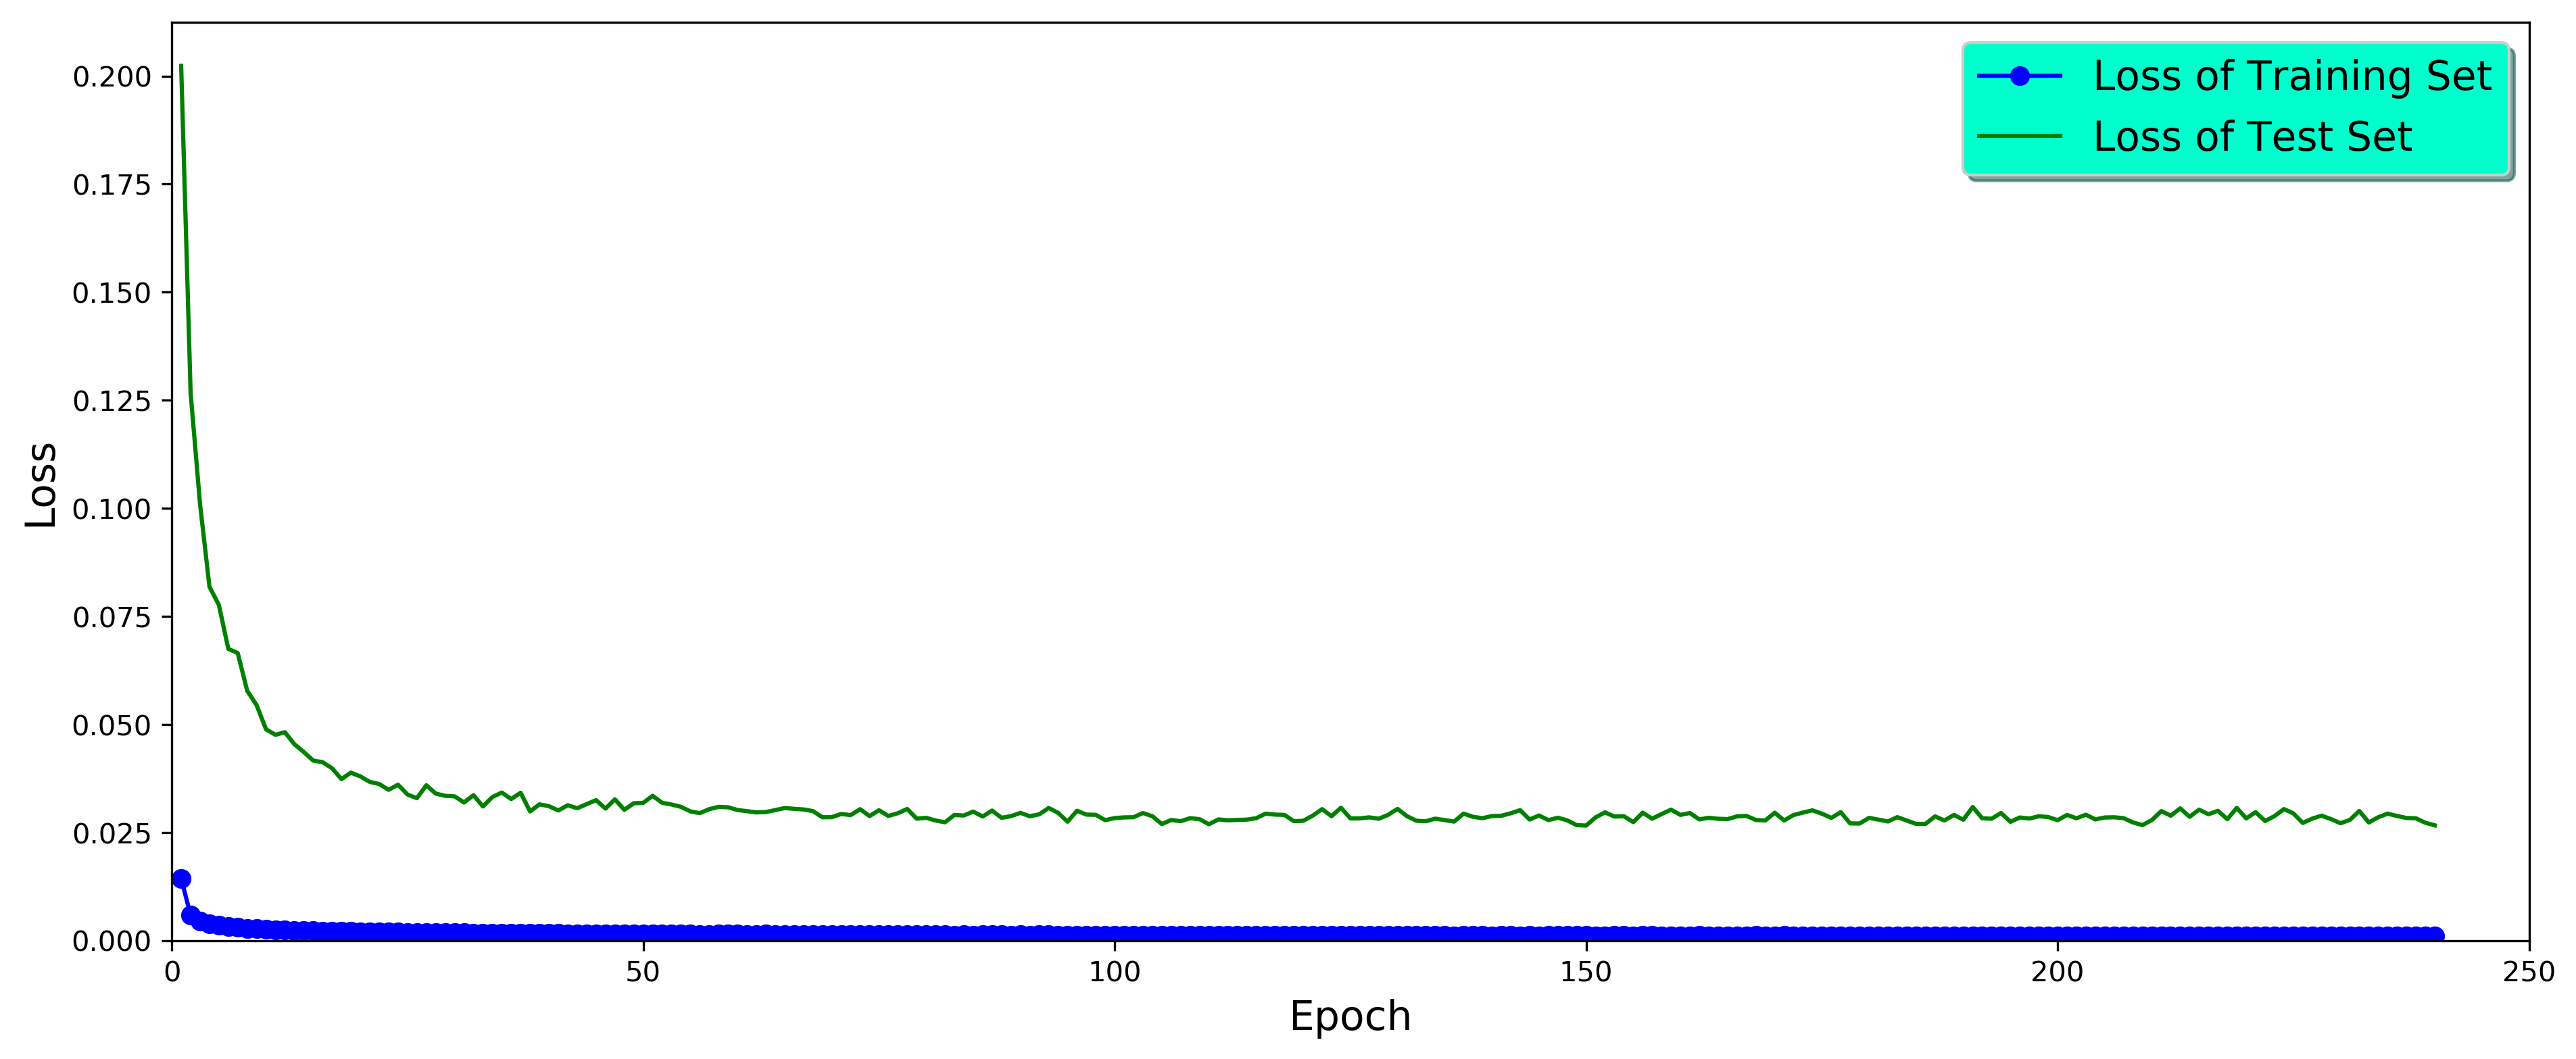

In [25]:
x_axis = np.linspace(1, epochs, epochs)

fig_kw = {'figsize':(15,6), 'dpi':300}

fig, ax = plt.subplots(**fig_kw)

ax.plot(x_axis, y_train_loss, '-bo', label='Loss of Training Set')
ax.plot(x_axis, y_test_loss, 'g-', label='Loss of Test Set')

plt.xlim(0, 250)
plt.ylim(ymin=0)
plt.xlabel('Epoch', fontsize='x-large')
plt.ylabel('Loss', fontsize='x-large')

legend = ax.legend(shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#00FFCC')

plt.show()

In [27]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Tags: 
    3    0    7    8    1    1    9    2
    2    1    4    8    5    9    7    2
    2    0    7    4    8    2    9    0
    4    1    0    7    2    0    2    6
    5    3    9    0    8    3    3    3
    4    3    8    2    5    9    8    5
    8    1    8    7    3    9    6    2
    6    4    1    6    7    1    8    1


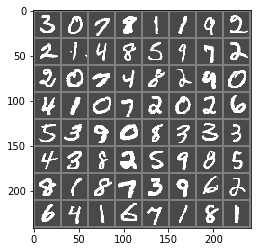

In [40]:
import torchvision
dataiter = iter(train_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('Tags: ')
for i in range(8):
    print(''.join('%5s' % labels[i*8+j].item() for j in range(8)))

In [13]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
model.eval()
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(test_batch_size):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            
for i in range(10):
    print('Accuracy of %3s : %.3f %%' % (
        i, 100 * class_correct[i] / class_total[i]))

Accuracy of   0 : 99.694 %
Accuracy of   1 : 99.119 %
Accuracy of   2 : 99.322 %
Accuracy of   3 : 99.010 %
Accuracy of   4 : 99.084 %
Accuracy of   5 : 98.767 %
Accuracy of   6 : 98.330 %
Accuracy of   7 : 98.735 %
Accuracy of   8 : 98.768 %
Accuracy of   9 : 98.117 %


In [14]:
wrong_stat = [list(0. for i in range(10))]*10

model.eval()
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        for i in range(test_batch_size):
            wrong_stat[labels[i]][predicted[i]] += 1

Top 10 wrong answer
Correct:  0 Wrong:  1 1131
Correct:  0 Wrong:  2 1036
Correct:  0 Wrong:  3 1011
Correct:  0 Wrong:  4 979
Correct:  0 Wrong:  5 893
Correct:  0 Wrong:  6 947
Correct:  0 Wrong:  7 1033
Correct:  0 Wrong:  8 971
Correct:  0 Wrong:  9 1006
Correct:  1 Wrong:  0 993
Correct:  1 Wrong:  2 1036
Correct:  1 Wrong:  3 1011
Correct:  1 Wrong:  4 979
Correct:  1 Wrong:  5 893
Correct:  1 Wrong:  6 947
Correct:  1 Wrong:  7 1033
Correct:  1 Wrong:  8 971
Correct:  1 Wrong:  9 1006
Correct:  2 Wrong:  0 993
Correct:  2 Wrong:  1 1131
Correct:  2 Wrong:  3 1011
Correct:  2 Wrong:  4 979
Correct:  2 Wrong:  5 893
Correct:  2 Wrong:  6 947
Correct:  2 Wrong:  7 1033
Correct:  2 Wrong:  8 971
Correct:  2 Wrong:  9 1006
Correct:  3 Wrong:  0 993
Correct:  3 Wrong:  1 1131
Correct:  3 Wrong:  2 1036
Correct:  3 Wrong:  4 979
Correct:  3 Wrong:  5 893
Correct:  3 Wrong:  6 947
Correct:  3 Wrong:  7 1033
Correct:  3 Wrong:  8 971
Correct:  3 Wrong:  9 1006
Correct:  4 Wrong:  0 993
C

In [15]:
print('Top 10 wrong answer')
ans = []
for i in range(10):
    for j in range(10):
        if i != j:
            ans.append((wrong_stat[i][j], (i, j)))
            # print('Correct: %d  Wrong: %d  Num: %d' % (i, j, wrong_stat[i][j]))
ans.sort(reverse=True)
for i in range(10):
    print('Correct: %d  Wrong: %d  Num: %d' % (ans[i][1][0], ans[i][1][1], ans[i][0]))

Top 10 wrong answer
Correct: 9  Wrong: 1  Num: 1131
Correct: 8  Wrong: 1  Num: 1131
Correct: 7  Wrong: 1  Num: 1131
Correct: 6  Wrong: 1  Num: 1131
Correct: 5  Wrong: 1  Num: 1131
Correct: 4  Wrong: 1  Num: 1131
Correct: 3  Wrong: 1  Num: 1131
Correct: 2  Wrong: 1  Num: 1131
Correct: 0  Wrong: 1  Num: 1131
Correct: 9  Wrong: 2  Num: 1036


In [16]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

result = []

model.eval()
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        for i in range(test_batch_size):
            if(predicted[i] == 1 and labels[i] != predicted[i]):
                result.append((images[i], labels[i], predicted[i], outputs[i]))

In [38]:
import torchvision
import math
def show(i):
    print('Correct: %d  Wrong: %d' % (result[i][1], result[i][2]))
    for j in range(10):
        tmp = math.exp(result[i][3][j])
        print('Probability of Num %d is %.3f' % (j, tmp))
    imshow(torchvision.utils.make_grid(result[i][0].cpu()))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Correct: 6  Wrong: 1
Probability of Num 0 is 0.000
Probability of Num 1 is 0.998
Probability of Num 2 is 0.001
Probability of Num 3 is 0.000
Probability of Num 4 is 0.000
Probability of Num 5 is 0.000
Probability of Num 6 is 0.001
Probability of Num 7 is 0.000
Probability of Num 8 is 0.000
Probability of Num 9 is 0.000


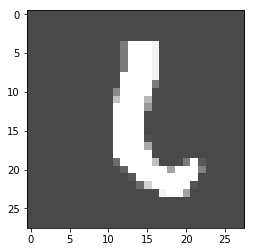

In [40]:
show(4)